1. Problem Description
In this project, the problem attempted to solve will be to find the best possible location or the most optimal, for a mexican restaurant in the city of Madrid, Spain. To achieve this task, an analytical approach will be used, based on advanced machine learning techniques and data analysis, concretely clustering and perhaps some data visualization techniques.

During the process of analysis, several data transformations will be performed, in order the find the best possible data format for the machine learning model to ingest. Once the data is set up and prepared, a modeling process will be carried out, and this statistical analysis will provide the best possible places to locate the mexican restaurant.


The data that will be used to develop this project is based on two sites:

1. The Foursquare Api: This data will be accesed via Python, and used to obtain the most common venues per neighborhood in the city of Madrid. This way, it is possible to have a taste of how the city's venues are distributed, what are the most common places for leisure, and in general, it will provide an idea of what people's likes are.

2. The Madrid City Hall's Web Portal: This site provides several data sources of great utility to solve this problem. The files are provided in Excel format, and they are built over a statstical exploitation and use basis. The data contains updated information about the inmigrant population per country and per nationality. This data will be analyzed in such a way that one could determine the best location of r anew venue/restaurant/other based on people's nationalities. For the sake of simplicity, it will be assumed for this exercise that people's likes varies according to their nationality, and that people from one specific country will be more attracted to place that matches the environment and culture of their own countries, rather than the ones from foreign countries.


### 3. Target Audience
The target audience of this project could be any business owner that is planning to open a new business local, restaurant, real state agency, shops, etc... Since this approach could be aplicable not only to mexican food restaurant but to other kind of businesses, anybody who is considering to place a new business local or even relocate it, could beneficiate of this project's approach.

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_cee048a06100495284e69a7ec7b733cb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='r0uEir93pLJv8KtWienFFXPxqaNOmGZrPL_hNFt8OPyc',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_cee048a06100495284e69a7ec7b733cb.get_object(Bucket='capstone-donotdelete-pr-xgu0nww0njd8zq', Key='C4210618.xls')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 



In [3]:
data = pd.read_excel(streaming_body_1, skiprows = 12)

In [4]:
data.head(7)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,...,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0
1,NaN,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,...,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0
2,NaN,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,...,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0
3,NaN,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,...,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0
4,NaN,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,...,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0
5,NaN,Marruecos,21909.0,1101.0,390.0,184.0,322.0,280.0,1393.0,320.0,...,942.0,3437.0,258.0,1011.0,426.0,3372.0,1655.0,802.0,649.0,333.0
6,NaN,Italia,20308.0,3030.0,1219.0,840.0,1817.0,1060.0,1194.0,1640.0,...,412.0,704.0,310.0,1258.0,1109.0,330.0,427.0,189.0,786.0,337.0


In [5]:
data.drop(columns = ['Unnamed: 0'], inplace = True)
data.columns = ['Country of Procedence', 'Total Ciudad de Madrid', 'Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartin',
                'Tetuán', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Latina', 'Carabanchel',
                'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
                'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas']
data.to_csv('Madrid Neighborhoods.csv')
data.head(25)

,Country of Procedence,Total Ciudad de Madrid,Centro,Arganzuela,Retiro,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,...,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
0,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,1830.0,...,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0
1,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,1733.0,...,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0
2,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,632.0,...,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0
3,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,1428.0,...,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0
4,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,999.0,...,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0
5,Marruecos,21909.0,1101.0,390.0,184.0,322.0,280.0,1393.0,320.0,930.0,...,942.0,3437.0,258.0,1011.0,426.0,3372.0,1655.0,802.0,649.0,333.0
6,Italia,20308.0,3030.0,1219.0,840.0,1817.0,1060.0,1194.0,1640.0,1195.0,...,412.0,704.0,310.0,1258.0,1109.0,330.0,427.0,189.0,786.0,337.0
7,Perú,18829.0,563.0,521.0,253.0,612.0,419.0,965.0,567.0,805.0,...,1131.0,2079.0,668.0,1726.0,603.0,1280.0,564.0,338.0,810.0,106.0
8,Paraguay,18682.0,364.0,474.0,237.0,521.0,657.0,3311.0,584.0,1024.0,...,727.0,1354.0,360.0,1619.0,583.0,870.0,217.0,199.0,581.0,151.0
9,República Dominicana,17511.0,365.0,654.0,204.0,344.0,322.0,2272.0,443.0,589.0,...,1202.0,1989.0,223.0,1581.0,359.0,1881.0,296.0,151.0,889.0,103.0


In [18]:
#!conda install -c conda-forge folium -y

In [53]:
import numpy as np # library to handle data in a vectorized manner

#import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [20]:
df = data #incase i use them interchangebly

In [21]:
print(len(data))

39


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 23 columns):
Country of Procedence     37 non-null object
Total Ciudad de Madrid    34 non-null float64
Centro                    34 non-null float64
Arganzuela                34 non-null float64
Retiro                    34 non-null float64
Salamanca                 34 non-null float64
Chamartin                 34 non-null float64
Tetuán                    34 non-null float64
Chamberí                  34 non-null float64
Fuencarral-El Pardo       34 non-null float64
Moncloa-Aravaca           34 non-null float64
Latina                    34 non-null float64
Carabanchel               34 non-null float64
Usera                     34 non-null float64
Puente de Vallecas        34 non-null float64
Moratalaz                 34 non-null float64
Ciudad Lineal             34 non-null float64
Hortaleza                 34 non-null float64
Villaverde                34 non-null float64
Villa de Vallecas       

In [23]:
data.isnull().sum()

Country of Procedence     2
Total Ciudad de Madrid    5
Centro                    5
Arganzuela                5
Retiro                    5
Salamanca                 5
Chamartin                 5
Tetuán                    5
Chamberí                  5
Fuencarral-El Pardo       5
Moncloa-Aravaca           5
Latina                    5
Carabanchel               5
Usera                     5
Puente de Vallecas        5
Moratalaz                 5
Ciudad Lineal             5
Hortaleza                 5
Villaverde                5
Villa de Vallecas         5
Vicálvaro                 5
San Blas-Canillejas       5
Barajas                   5
dtype: int64

In [24]:
# Create a new dataframe for co-ordinates

coordinates_df = pd.DataFrame( data = {

'Neighborhood' : ['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartin',
                'Tetuán', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Latina', 'Carabanchel',
                'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
                'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas'],
'Latitude' : ['40.415347', '40.402733', '40.408072', '40.43', '40.453333', '40.460556', '40.432792', '40.478611', '40.435151',
                 '40.402461', '40.383669', '40.381336', '40.398204', '40.409869', '40.45', '40.469457', '40.345925', '40.3796', 
                 '40.4042', '40.426001', '40.470196'],
'Longitude' : ['-3.707371', '-3.695403', '-3.676729', '-3.677778', '-3.6775', '-3.7', '-3.697186', '-3.709722', '-3.718765', 
                  '-3.741294', '-3.727989', '-3.706856', '-3.669059', '-3.644436', '-3.65', '-3.640482', '-3.709356', '-3.62135', 
                  '-3.60806', '-3.612764', '-3.58489']})

In [25]:

coordinates_df.head()

,Latitude,Longitude,Neighborhood
0,40.415347,-3.707371,Centro
1,40.402733,-3.695403,Arganzuela
2,40.408072,-3.676729,Retiro
3,40.43,-3.677778,Salamanca
4,40.453333,-3.6775,Chamartin


In [26]:
coordinates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
Latitude        21 non-null object
Longitude       21 non-null object
Neighborhood    21 non-null object
dtypes: object(3)
memory usage: 584.0+ bytes


In [27]:
#lets convert the columns from bject to float
coordinates_df['Latitude'] = coordinates_df['Latitude'].astype('float', errors = 'ignore')
coordinates_df['Longitude'] = coordinates_df['Longitude'].astype('float', errors = 'ignore')
coordinates_df.dtypes

Latitude        float64
Longitude       float64
Neighborhood     object
dtype: object

In [28]:
# Get latitudes and longitudes of Madrid
address = 'Madrid, Madrid'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Madrid are 40.4167047, -3.7035825.


In [31]:
# lets create a map of madrid

Madrid_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(coordinates_df['Latitude'], coordinates_df['Longitude'], coordinates_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Madrid_map)  
    
Madrid_map

In [32]:
#Explore the Neighborhoods with Foursquare data
#Define Foursquare credentials and version
CLIENT_ID = 'HG5L21HMCFBOK55V0E2BFSVEAEWSUR5KMSE53RAWNE3GCUJ0' # Foursquare ID
CLIENT_SECRET = 'RALCF2HHAFL40OTBOWB5D1PU2F1FSYUJ3L5TRU3QQ213D1DF' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: HG5L21HMCFBOK55V0E2BFSVEAEWSUR5KMSE53RAWNE3GCUJ0
CLIENT_SECRET:RALCF2HHAFL40OTBOWB5D1PU2F1FSYUJ3L5TRU3QQ213D1DF


In [33]:
#get the first neighborhood name
coordinates_df.loc[0, 'Neighborhood']

'Centro'

In [34]:
# lets get the longitude and latitude
neighborhood_latitude = coordinates_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = coordinates_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = coordinates_df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Centro are 40.415347, -3.707371.


In [35]:
# lets now expolore the top 100 venues in our location
LIMIT= 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [36]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d10ce40e97dfb002ca79cdc'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4adcda37f964a520193c21e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d164941735',
         'name': 'Plaza',
         'pluralName': 'Plazas',
         'primary': True,
         'shortName': 'Plaza'}],
       'id': '4adcda37f964a520193c21e3',
       'location': {'address': 'Pl. Mayor',
        'cc': 'ES',
        'city': 'Madrid',
        'country': 'España',
        'distance': 16,
        'formattedAddress': ['Pl. Mayor', '28012 Madrid Madrid', 'España'],
        'lat': 40.415437525568024,
        'lng': -3.707521056202871,
        'postalCode': '28012',
        'state': 'Ma

In [37]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [38]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Plaza Mayor,Plaza,40.415438,-3.707521
1,Mercado de San Miguel,Market,40.415443,-3.708943
2,La Taberna de Mister Pinkleton,Other Nightlife,40.414536,-3.708108
3,The Hat Madrid,Hotel,40.414343,-3.707120
4,Amorino,Ice Cream Shop,40.416065,-3.708383


In [39]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [40]:
# Now we are going to create a function 
#that repeats all the above process for all the neighborhoods in Madrid, 
#so we can explore these neighborhoods in more depth
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:

Madrid_venues = getNearbyVenues(names= coordinates_df['Neighborhood'],
                                   latitudes= coordinates_df['Latitude'],
                                   longitudes= coordinates_df['Longitude']
                                  )

Centro
Arganzuela
Retiro
Salamanca
Chamartin
Tetuán
Chamberí
Fuencarral-El Pardo
Moncloa-Aravaca
Latina
Carabanchel
Usera
Puente de Vallecas
Moratalaz
Ciudad Lineal
Hortaleza
Villaverde
Villa de Vallecas
Vicálvaro
San Blas-Canillejas
Barajas


In [42]:
#heck the size of our new df

print(Madrid_venues.shape)
Madrid_venues.head()

(753, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro,40.415347,-3.707371,Plaza Mayor,40.415438,-3.707521,Plaza
1,Centro,40.415347,-3.707371,Mercado de San Miguel,40.415443,-3.708943,Market
2,Centro,40.415347,-3.707371,La Taberna de Mister Pinkleton,40.414536,-3.708108,Other Nightlife
3,Centro,40.415347,-3.707371,The Hat Madrid,40.414343,-3.707120,Hotel
4,Centro,40.415347,-3.707371,Amorino,40.416065,-3.708383,Ice Cream Shop


In [43]:
Madrid_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arganzuela,86,86,86,86,86,86
Barajas,31,31,31,31,31,31
Carabanchel,7,7,7,7,7,7
Centro,100,100,100,100,100,100
Chamartin,53,53,53,53,53,53
Chamberí,100,100,100,100,100,100
Ciudad Lineal,25,25,25,25,25,25
Fuencarral-El Pardo,40,40,40,40,40,40
Hortaleza,20,20,20,20,20,20


In [44]:
#lets analyze our neighborhood

# one hot encoding
madrid_onehot = pd.get_dummies(Madrid_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
madrid_onehot['Neighborhood'] = Madrid_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]
#madrid_onehot = madrid_onehot[['Neighborhood',
madrid_onehot.head()

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nightclub,Noodle House,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paella Restaurant,Park,Pastry Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pub,Ramen Restaurant,Restaurant,Rock Club,Salad Place,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trade School,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Women's Store
0,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
madrid_onehot.shape

(753, 158)

In [46]:

madrid_grouped = madrid_onehot.groupby('Neighborhood').mean().reset_index()
madrid_grouped

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nightclub,Noodle House,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paella Restaurant,Park,Pastry Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pub,Ramen Restaurant,Restaurant,Rock Club,Salad Place,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trade School,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Women's Store
0,Arganzuela,0.00,0.023256,0.000000,0.000000,0.00,0.011628,0.000000,0.000000,0.046512,0.000000,0.000000,0.023256,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.023256,0.023256,0.0,0.023256,0.000000,0.000000,0.000000,0.00,0.011628,0.00,0.000000,0.011628,0.000000,0.000000,0.011628,0.00,0.011628,0.000,0.00,0.011628,0.000000,0.00,0.000,0.011628,0.000000,0.000,0.000000,0.000000,0.000000,0.011628,0.000000,0.023256,0.011628,0.000000,0.000000,0.011628,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.011628,0.011628,0.000000,0.00,0.000000,0.000,0.046512,0.011628,0.034884,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.023256,0.000000,0.000,0.00,0.011628,0.011628,0.000000,0.000000,0.000000,0.000000,0.011628,0.000000,0.000000,0.023256,0.000000,0.011628,0.000000,0.000000,0.000,0.000000,0.000000,0.011628,0.011628,0.011628,0.000000,0.0,0.011628,0.00,0.011628,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.023256,0.000000,0.011628,0.000,0.000000,0.000000,0.104651,0.00,0.000000,0.011628,0.023256,0.000000,0.011628,0.000000,0.00,0.000000,0.00,0.023256,0.000000,0.000000,0.00,0.116279,0.000000,0.000000,0.000000,0.000000,0.046512,0.011628,0.00,0.011628,0.00,0.011628,0.000,0.011628,0.011628,0.000000,0.000,0.000000,0.000000,0.000000
1,Barajas,0.00,0.000000,0.032258,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000,0.032258,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.032258,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.064516,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.00,0.000,0.000000,0.032258,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0

In [47]:
# 5 top venues by neighborhood
num_top_venues = 5

for hood in madrid_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = madrid_grouped[madrid_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arganzuela----
                venue  freq
0  Spanish Restaurant  0.12
1          Restaurant  0.10
2       Grocery Store  0.05
3    Tapas Restaurant  0.05
4              Bakery  0.05


----Barajas----
                venue  freq
0               Hotel  0.23
1  Spanish Restaurant  0.10
2          Restaurant  0.10
3         Coffee Shop  0.06
4         Supermarket  0.06


----Carabanchel----
                  venue  freq
0                 Plaza  0.14
1                Bakery  0.14
2          Soccer Field  0.14
3             Nightclub  0.14
4  Fast Food Restaurant  0.14


----Centro----
                venue  freq
0  Spanish Restaurant  0.13
1    Tapas Restaurant  0.08
2               Plaza  0.05
3          Restaurant  0.04
4               Hotel  0.04


----Chamartin----
                venue  freq
0  Spanish Restaurant  0.21
1          Restaurant  0.13
2              Bakery  0.06
3       Grocery Store  0.06
4         Pizza Place  0.06


----Chamberí----
                 venue  freq
0   

In [48]:
# lets sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
#putting it in a new df to show the top 10 venues by neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = madrid_grouped['Neighborhood']

for ind in np.arange(madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arganzuela,Spanish Restaurant,Restaurant,Bakery,Tapas Restaurant,Grocery Store,Gym / Fitness Center,Breakfast Spot,Pizza Place,Hotel,Falafel Restaurant
1,Barajas,Hotel,Spanish Restaurant,Restaurant,Supermarket,Tapas Restaurant,Coffee Shop,Japanese Restaurant,Bistro,Gastropub,Bar
2,Carabanchel,Soccer Field,Burger Joint,Pizza Place,Plaza,Fast Food Restaurant,Bakery,Nightclub,Electronics Store,Fish Market,Farmers Market
3,Centro,Spanish Restaurant,Tapas Restaurant,Plaza,Mexican Restaurant,Hotel,Restaurant,Ice Cream Shop,Gift Shop,Wine Bar,Bistro
4,Chamartin,Spanish Restaurant,Restaurant,Grocery Store,Pizza Place,Bakery,Café,Japanese Restaurant,Park,Gastropub,Hotel
5,Chamberí,Spanish Restaurant,Brewery,Bar,Restaurant,Japanese Restaurant,Tapas Restaurant,Hotel,Plaza,Café,Burger Joint
6,Ciudad Lineal,Spanish Restaurant,Gastropub,Supermarket,Restaurant,Burger Joint,Argentinian Restaurant,Pharmacy,Diner,Bakery,German Restaurant
7,Fuencarral-El Pardo,Italian Restaurant,Clothing Store,Fast Food Restaurant,American Restaurant,Burger Joint,Tapas Restaurant,Cosmetics Shop,Sandwich Place,Restaurant,Pizza Place
8,Hortaleza,Pizza Place,Breakfast Spot,Spanish Restaurant,Pharmacy,Supermarket,Park,Clothing Store,Donut Shop,Plaza,Pub
9,Latina,Pizza Place,Park,Train Station,Grocery Store,Fast Food Restaurant,Bakery,Metro Station,Falafel Restaurant,Women's Store,Electronics Store


In [55]:
#Get neighborhoods's clusters
#First, let's determine the optimal value of K for our dataset using the Elbow method

madrid_grouped_clustering = madrid_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1, 22)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(madrid_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

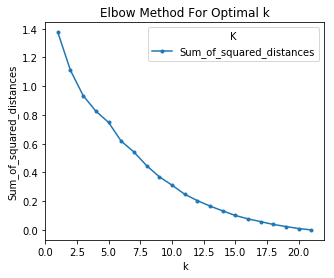

In [56]:
#plot and visualise our optimal K
optimal_k= pd.DataFrame(data= Sum_of_squared_distances, columns = ['Sum_of_squared_distances'], index = K)
optimal_k.rename_axis('K', axis = 'columns', inplace = True)
#optimal_k
optimal_k.plot(kind = 'line', figsize = (5, 4), marker = '.')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [57]:
#it seems our best K is 5
# let now build on our best K
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 4, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [58]:
#Now let's put our cluster labels in our neighborhoods_venues_sorted df
#First, we need to remove the rows in our original df for which the Foursquare call didn't return any venues
df['Neighborhood'] = neighborhoods_venues_sorted['Neighborhood']
print(df.shape)
df.isnull().sum()
df.dropna(how = 'any', axis = 0, inplace = True)
print(df.shape)
print(neighborhoods_venues_sorted.shape)

(39, 24)
(21, 24)
(21, 11)


Segment the neighborhoods by population's nationalities and most common venues
Now we are going to create a new df that contains the cluster labels as well as the top 10 venues per neighborhood

In [59]:
madrid_merged = df

# add clustering labels
madrid_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
madrid_merged[['Latitude', 'Longitude']] = coordinates_df[['Latitude', 'Longitude']]
madrid_merged['Latitude'] = madrid_merged['Latitude'].astype(float)
madrid_merged['Longitude'] = madrid_merged['Longitude'].astype(float)
print(madrid_merged.shape)
madrid_merged.head() # check the last columns!

(21, 37)


,Country of Procedence,Total Ciudad de Madrid,Centro,Arganzuela,Retiro,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0,Arganzuela,1,Spanish Restaurant,Restaurant,Bakery,Tapas Restaurant,Grocery Store,Gym / Fitness Center,Breakfast Spot,Pizza Place,Hotel,Falafel Restaurant,40.415347,-3.707371
1,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,1733.0,960.0,2554.0,4398.0,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0,Barajas,1,Hotel,Spanish Restaurant,Restaurant,Supermarket,Tapas Restaurant,Coffee Shop,Japanese Restaurant,Bistro,Gastropub,Bar,40.402733,-3.695403
2,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0,Carabanchel,4,Soccer Field,Burger Joint,Pizza Place,Plaza,Fast Food Restaurant,Bakery,Nightclub,Electronics Store,Fish Market,Farmers Market,40.408072,-3.676729
3,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0,Centro,1,Spanish Restaurant,Tapas Restaurant,Plaza,Mexican Restaurant,Hotel,Restaurant,Ice Cream Shop,Gift Shop,Wine Bar,Bistro,40.430000,-3.677778
4,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,999.0,454.0,1786.0,3395.0,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0,Chamartin,1,Spanish Restaurant,Restaurant,Grocery Store,Pizza Place,Bakery,Café,Japanese Restaurant,Park,Gastropub,Hotel,40.453333,-3.677500


In [60]:
# lets visualise our cluster
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Neighborhood'], madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [61]:
#lets examine our clusters

In [62]:
#cluster 1
madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, madrid_merged.columns[[0] + list(range(6, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
17,Bulgaria,123.0,245.0,74.0,316.0,170.0,996.0,988.0,395.0,760.0,285.0,780.0,283.0,516.0,261.0,269.0,662.0,92.0,Usera,0,Seafood Restaurant,Bubble Tea Shop,Spanish Restaurant,Asian Restaurant,Noodle House,Café,Theater,Fast Food Restaurant,Chinese Restaurant,Falafel Restaurant,40.3796,-3.62135


In [63]:
#cluster 2
madrid_merged.loc[madrid_merged['Cluster Labels'] == 1, madrid_merged.columns[[0] + list(range(6, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
3,Venezuela,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0,Centro,1,Spanish Restaurant,Tapas Restaurant,Plaza,Mexican Restaurant,Hotel,Restaurant,Ice Cream Shop,Gift Shop,Wine Bar,Bistro,40.430000,-3.677778
0,Rumanía,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0,Arganzuela,1,Spanish Restaurant,Restaurant,Bakery,Tapas Restaurant,Grocery Store,Gym / Fitness Center,Breakfast Spot,Pizza Place,Hotel,Falafel Restaurant,40.415347,-3.707371
13,Portugal,534.0,590.0,509.0,693.0,365.0,533.0,658.0,283.0,597.0,173.0,612.0,727.0,302.0,262.0,168.0,565.0,191.0,Retiro,1,Spanish Restaurant,Bar,Tapas Restaurant,Grocery Store,Museum,Gym,Mexican Restaurant,Mediterranean Restaurant,Pizza Place,Plaza,40.409869,-3.644436
7,Perú,419.0,965.0,567.0,805.0,368.0,2026.0,2425.0,1131.0,2079.0,668.0,1726.0,603.0,1280.0,564.0,338.0,810.0,106.0,Fuencarral-El Pardo,1,Italian Restaurant,Clothing Store,Fast Food Restaurant,American Restaurant,Burger Joint,Tapas Restaurant,Cosmetics Shop,Sandwich Place,Restaurant,Pizza Place,40.478611,-3.709722
5,Marruecos,280.0,1393.0,320.0,930.0,342.0,1539.0,2223.0,942.0,3437.0,258.0,1011.0,426.0,3372.0,1655.0,802.0,649.0,333.0,Chamberí,1,Spanish Restaurant,Brewery,Bar,Restaurant,Japanese Restaurant,Tapas Restaurant,Hotel,Plaza,Café,Burger Joint,40.460556,-3.700000
6,Italia,1060.0,1194.0,1640.0,1195.0,710.0,826.0,915.0,412.0,704.0,310.0,1258.0,1109.0,330.0,427.0,189.0,786.0,337.0,Ciudad Lineal,1,Spanish Restaurant,Gastropub,Supermarket,Restaurant,Burger Joint,Argentinian Restaurant,Pharmacy,Diner,Bakery,German Restaurant,40.432792,-3.697186
10,Honduras,337.0,755.0,317.0,863.0,335.0,2021.0,2870.0,1115.0,2483.0,281.0,1062.0,349.0,1040.0,387.0,165.0,598.0,62.0,Moncloa-Aravaca,1,Bar,Tapas Restaurant,Italian Restaurant,Bakery,Japanese Restaurant,Spanish Restaurant,Pizza Place,Coffee Shop,Mediterranean Restaurant,Restaurant,40.383669,-3.727989
14,Francia,554.0,387.0,699.0,366.0,347.0,196.0,188.0,66.0,138.0,85.0,599.0,1802.0,68.0,59.0,52.0,357.0,197.0,Salamanca,1,Spanish Restaurant,Seafood Restaurant,Tapas Restaurant,Coffee Shop,Restaurant,Mediterranean Restaurant,Clothing Store,Mexican Restaurant,Gym,Bakery,40.450000,-3.650000
12,Filipinas,661.0,4473.0,771.0,442.0,568.0,629.0,400.0,225.0,418.0,76.0,590.0,300.0,140.0,25.0,24.0,152.0,30.0,Puente de Vallecas,1,Fast Food Restaurant,Gym,Grocery Store,Bakery,Bar,Hotel,Tapas Restaurant,Supermarket,Coffee Shop,Camera Store,40.398204,-3.669059
4,Colombia,551.0,822.0,659.0,999.0,454.0,1786.0,3395.0,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0,Chamartin,1,Spanish Restaurant,Restaurant,Grocery Store,Pizza Place,Bakery,Café,Japanese Restaurant,Park,Gastropub,Hotel,40.453333,-3.677500


In [65]:
#cluster 3
madrid_merged.loc[madrid_merged['Cluster Labels'] == 2, madrid_merged.columns[[0] + list(range(6, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
15,Ucrania,176.0,221.0,149.0,312.0,168.0,1745.0,1251.0,428.0,912.0,239.0,348.0,282.0,1649.0,256.0,152.0,390.0,56.0,San Blas-Canillejas,2,Metro Station,Supermarket,Snack Place,Pizza Place,Gym,Asian Restaurant,Grocery Store,Shopping Mall,Flea Market,Fish Market,40.469457,-3.640482
9,República Dominicana,322.0,2272.0,443.0,589.0,536.0,1501.0,1607.0,1202.0,1989.0,223.0,1581.0,359.0,1881.0,296.0,151.0,889.0,103.0,Latina,2,Pizza Place,Park,Train Station,Grocery Store,Fast Food Restaurant,Bakery,Metro Station,Falafel Restaurant,Women's Store,Electronics Store,40.402461,-3.741294
19,Reino Unido,466.0,329.0,501.0,313.0,304.0,211.0,170.0,81.0,142.0,59.0,285.0,319.0,61.0,49.0,27.0,120.0,74.0,Villa de Vallecas,2,Soccer Field,Grocery Store,Spanish Restaurant,Sandwich Place,Plaza,Church,Train Station,Diner,Fabric Shop,Fish Market,40.426001,-3.612764
8,Paraguay,657.0,3311.0,584.0,1024.0,636.0,2061.0,2152.0,727.0,1354.0,360.0,1619.0,583.0,870.0,217.0,199.0,581.0,151.0,Hortaleza,2,Pizza Place,Breakfast Spot,Spanish Restaurant,Pharmacy,Supermarket,Park,Clothing Store,Donut Shop,Plaza,Pub,40.435151,-3.718765
18,Estados Unidos de América,389.0,300.0,657.0,297.0,428.0,207.0,125.0,86.0,139.0,232.0,252.0,206.0,54.0,51.0,33.0,101.0,57.0,Vicálvaro,2,Pizza Place,Spanish Restaurant,Breakfast Spot,Plaza,Café,Fast Food Restaurant,Sandwich Place,Beer Bar,Grocery Store,Dog Run,40.404200,-3.608060
11,Bolivia,315.0,576.0,280.0,401.0,225.0,1458.0,2625.0,2827.0,1573.0,227.0,1086.0,479.0,737.0,222.0,159.0,454.0,71.0,Moratalaz,2,Brewery,Bar,Park,Soccer Field,Pizza Place,Food Truck,Plaza,Ice Cream Shop,Bakery,Nightclub,40.381336,-3.706856


In [67]:
#cluster 4
madrid_merged.loc[madrid_merged['Cluster Labels'] == 3, madrid_merged.columns[[0] + list(range(6, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
20,Bangladesh,21.0,210.0,48.0,27.0,14.0,257.0,410.0,175.0,649.0,23.0,179.0,27.0,489.0,57.0,32.0,78.0,2.0,Villaverde,3,Spanish Restaurant,Pizza Place,Diner,Electronics Store,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fabric Shop,40.470196,-3.58489


In [69]:
#cluster 5
madrid_merged.loc[madrid_merged['Cluster Labels'] == 4, madrid_merged.columns[[0] + list(range(6, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
2,Ecuador,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0,Carabanchel,4,Soccer Field,Burger Joint,Pizza Place,Plaza,Fast Food Restaurant,Bakery,Nightclub,Electronics Store,Fish Market,Farmers Market,40.408072,-3.676729


As far as we are able to see with this data, there are no mexican populations registered in Madrid. However, in Cluster 2, it is possible to notice that there's a mexican restaurant located in the "Centro" neighborhood, which is the town center.

If a deeper exam is performed into this cluster, it is noticeable that its the living population are mostly latinos, mixed with some other europeans, but mainly, the people living in this cluster come from south american countries. Apart of this fact, other kinds of latin restaurants can be found, like argetinian restaurants, tapas restaurants, and italian restaurants. So it is possible to tell that the inhabitants of this area likes these kinds of food.

By following this logic, if we would like to open a new mexican restaurant in the city or any kind of restaurant in fact, it would only be necessary to find a where are the restaurants similar the the one we want to open, study the population in that area, and find similar clusters of population in the city that don't have yet or have very few resturants like the one we would like to open.

In this example, clusters 4 and 5 could make a good match for our target population. Looking at the venues in these clusters, it is possible to find one mexican restaurant, and a good bunch of fast food, argentinian, and south american restaurants. So, in these clusters, it is possible to state that the existing restaurants matches the population's nationalities and tastes.

In conlussion, and taking into consideration the explanations given above as well as the data, it is highly possible that clusters 4 and five could be a good place to open our mexican restaurants. As explained above, the same logic could apply to oopen other kind of restaurant or business in any other area of the city. It is only necessary to to examine the the existing businesses in our target area, and study the population, then compare these 2 factors with the same ones in areas where there are existing business like the one we want to open, and then verify if the matching is correct.